<a href="https://colab.research.google.com/github/Dhayanshariff/Task-5--User-Engagement/blob/main/Source_Code/Task_5_User_Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm  

In [118]:
df_user = pd.read_csv("takehome_users.csv",encoding='latin-1')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [119]:
df_engt = pd.read_csv("takehome_user_engagement.csv")
df_engt.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


**Adopted  user** -  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period

In [120]:
df_engt['time_stamp']=pd.to_datetime(df_engt['time_stamp'])
grouped_user = df_engt.groupby('user_id')
date = grouped_user.rolling('7D', on='time_stamp')['visited'].count()
date = date.to_frame().reset_index()
date = date.groupby('user_id')['visited'].max().reset_index()
adopted_user = date
adopted_user['adopted_user']=date['visited'].apply(lambda k: 1 if k>=3 else 0)
adopted_user

,user_id,visited,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0
...,...,...,...
8818,11996,1.0,0
8819,11997,1.0,0
8820,11998,1.0,0
8821,11999,1.0,0


In [121]:
adopted_user.drop('visited',axis=1,inplace=True)
adopted_user.rename({'user_id':'object_id'},axis=1,inplace=True)
adopted_user.set_index("object_id", inplace = True)
df_main_user = df_user.join(adopted_user,how='left',on='object_id')
df_main_user.fillna(0,inplace=True)
df_main_user

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0.0


In [122]:
df_main_user['last_session_creation_time'] =  df_main_user['last_session_creation_time'].apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
df_main_user['last_session_creation_time'] = pd.to_datetime(df_main_user['last_session_creation_time'])
df_main_user['creation_time'] = df_main_user['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df_main_user['creation_time'] = pd.to_datetime(df_main_user['creation_time'])
df_main_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [123]:
crn_source = list(df_main_user['creation_source'].unique())
for i in range(len(crn_source)):  
    df_main_user['creation_source']=df_main_user['creation_source'].replace({crn_source[i]:i})
df_main_user

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,1,2013-09-06 06:14:15,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,4,2013-01-15 18:28:37,0,0,200,0.0,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,0,2014-04-27 12:45:16,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,3,2012-06-02 11:55:59,0,0,6,0.0,0.0


In [124]:
#days where user is active
df_main_user['active_days'] = (df_main_user['last_session_creation_time'].sub(df_main_user['creation_time'])).dt.days
col = df_main_user.pop('active_days')
df_main_user.insert(9,'active_days', col)
for i in range(len(df_main_user['active_days'])):
   if df_main_user['active_days'][i]<0:
      df_main_user['active_days'][i]=0
df_main_user.head()

<ipython-input-124-1a08be8b381d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_user['active_days'][i]=0


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active_days,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,0,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,136,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,0,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5,5240.0,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


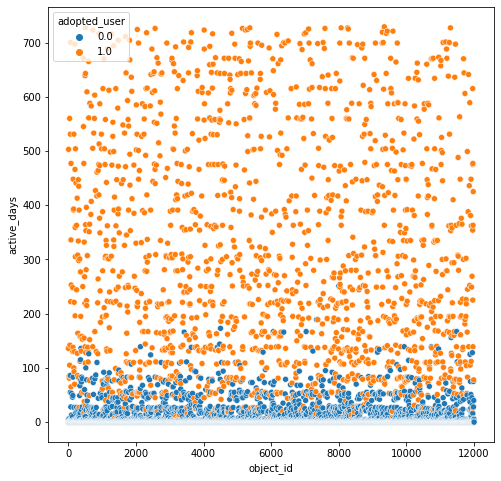

In [129]:
figure1=plt.figure(figsize=(8,8))
sns.scatterplot(df_main_user['object_id'],df_main_user['active_days'],df_main_user['adopted_user'])
plt.show()

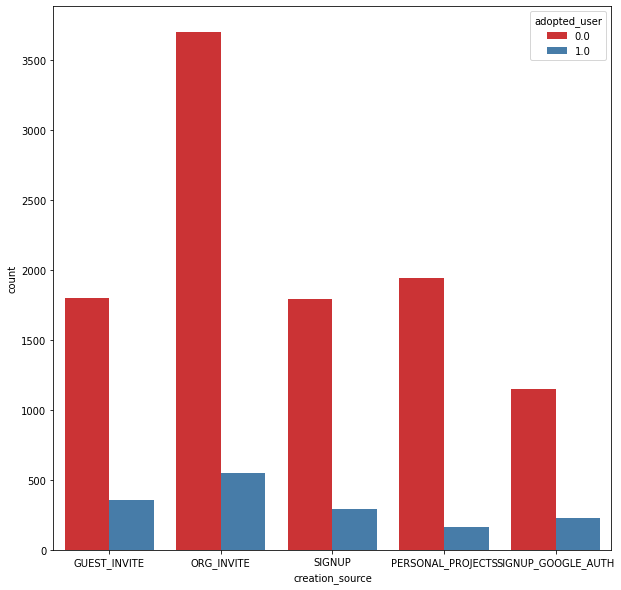

In [131]:
l1 =list(df_user.creation_source.unique())
fig=plt.figure(figsize=(10,10))
sns.countplot(x='creation_source', data=df_main_user,hue='adopted_user', palette='Set1')
plt.xticks(np.arange(len(l1)),labels=l1)
plt.show()

***Eventhough creation source does not have much impact on adopted user, ORG_INVITE has considerable impact than other sources***

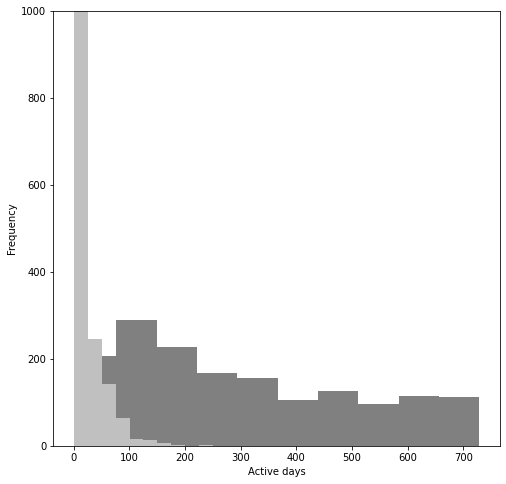

In [130]:
figure2 = plt.figure(figsize=(8,8))
plt.hist(df_main_user.active_days[df_main_user['adopted_user']==1],color='grey')
plt.hist(df_main_user.active_days[df_main_user['adopted_user']==0],color='silver')
plt.xlabel("Active days")
plt.ylabel("Frequency")
plt.ylim(0,1000)
plt.show()     

***The users with more frequent time are adopted users, which is not an useful prediction***

In [132]:
x=df_main_user[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','active_days','invited_by_user_id']]
y=df_main_user[['adopted_user']]
x_cons=sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [133]:
x_log=sm.Logit(y,x_cons)
res_log=x_log.fit()
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.073924
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           adopted_user   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11993
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Feb 2023   Pseudo R-squ.:                  0.8119
Time:                        15:11:09   Log-Likelihood:                -887.09
converged:                       True   LL-Null:                       -4715.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.0893      0.233    -21.834      0.000      -5.546      -4.632
creation_source                0.0019      0.071      0.026      0.979      -0.137       0.141
opted_in_to_mailing_list       0.2305      0.183      1.261      0.207      -0.128       0.589
enabled_for_marketing_drip    -0.1287      0.223     -0.578      0.563      -0.565       0.308
org_id                         0.0012      0.001      2.170      0.030       0.000       0.002
active_days                    0.0629      0.002     34.602      0.000       0.059       0.067
invited_by_user_id          1.611e-05   2.36e-05      0.683      0.495   -3.01e-05    6.23e-05
==============================================================================================
"""

In [134]:
print("Regression Co-efficients:\n")
print(res_log.params[1:],'\n\n')
cm =res_log.pred_table()
accuracy_train=100*(cm[0,0]+cm[1,1])/cm.sum()
print("Accuracy : ",accuracy_train)

Regression Co-efficients:

creation_source               0.001879
opted_in_to_mailing_list      0.230458
enabled_for_marketing_drip   -0.128720
org_id                        0.001196
active_days                   0.062945
invited_by_user_id            0.000016
dtype: float64 


Accuracy :  97.45833333333333


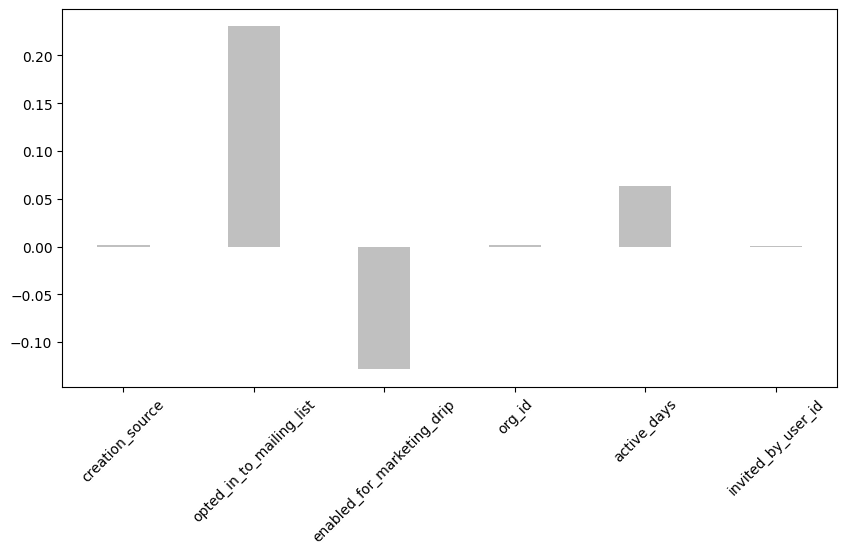

In [135]:
result = res_log.params[1:].to_frame().reset_index()
a=list(result['index'])
b=list(result[0]) 
figure3=plt.figure(figsize=(10,5),dpi=100)
plt.bar(a,b,width=0.4,color = 'silver')
plt.xticks(rotation=45)
plt.show()

1) From the above graph its clear that ***Opting_into_mailing_list*** increase the odds of an user becoming adopted user

2) The ***enabling_for marketing_drip*** has the least impact on user becoming adopted user.